In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split

In [3]:
column_names = ["Status of existing checking account", "Duration in month", "Credit history", "Purpose", "Credit amount",
           "Savings account/bonds", "Present employment since", "Installment rate in percentage of disposable income",
           "Personal status and sex", "Other debtors / guarantors", "Present residence since", "Property", "Age in years",
           "Other installment plans", "Housing", "Number of existing credits at this bank", "Job", 
           "Number of people being liable to provide maintenance for", "Telephone", "foreign worker", 'Class']

data = pd.read_csv("data/train_test/german_train_test.csv")
data.columns = column_names
data.head()


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


# Data interpretation

## Attribute 1: Status of existing checking account
- A11: ... < 0 DM
- A12: 0 <= ... < 200 DM
- A13: ... >= 200 DM / salary assignments for at least 1 year
- A14: no checking account

## Attribute 2: Duration in month
- Numerical

## Attribute 3: Credit history
- A30: no credits taken/all credits paid back duly
- A31: all credits at this bank paid back duly
- A32: existing credits paid back duly till now
- A33: delay in paying off in the past
- A34: critical account/other credits existing (not at this bank)

## Attribute 4: Purpose
- A40: car (new)
- A41: car (used)
- A42: furniture/equipment
- A43: radio/television
- A44: domestic appliances
- A45: repairs
- A46: education
- A47: (vacation - does not exist?)
- A48: retraining
- A49: business
- A410: others

## Attribute 5: Credit amount
- Numerical

## Attribute 6: Savings account/bonds
- A61: ... < 100 DM
- A62: 100 <= ... < 500 DM
- A63: 500 <= ... < 1000 DM
- A64: ... >= 1000 DM
- A65: unknown/no savings account

## Attribute 7: Present employment since
- A71: unemployed
- A72: ... < 1 year
- A73: 1 <= ... < 4 years
- A74: 4 <= ... < 7 years
- A75: ... >= 7 years

## Attribute 8: Installment rate in percentage of disposable income
- Numerical

## Attribute 9: Personal status and sex
- A91: male: divorced/separated
- A92: female: divorced/separated/married
- A93: male: single
- A94: male: married/widowed
- A95: female: single

## Attribute 10: Other debtors/guarantors
- A101: none
- A102: co-applicant
- A103: guarantor

## Attribute 11: Present residence since
- Numerical

## Attribute 12: Property
- A121: real estate
- A122: if not A121: building society savings agreement/life insurance
- A123: if not A121/A122: car or other, not in attribute 6
- A124: unknown/no property

## Attribute 13: Age in years
- Numerical

## Attribute 14: Other installment plans
- A141: bank
- A142: stores
- A143: none

## Attribute 15: Housing
- A151: rent
- A152: own
- A153: for free

## Attribute 16: Number of existing credits at this bank
- Numerical

## Attribute 17: Job
- A171: unemployed/unskilled - non-resident
- A172: unskilled - resident
- A173: skilled employee/official
- A174: management/self-employed/highly qualified employee/officer

## Attribute 18: Number of people being liable to provide maintenance for
- Numerical

## Attribute 19: Telephone
- A191: none
- A192: 02: no
nal status  
1 : single  
2 : married  
 Personal status
1 : single
2 : married
ars
unt
 bank)

In [4]:
data.shape

(899, 21)

In [5]:
data.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

[[<Axes: title={'center': 'Duration in month'}>
  <Axes: title={'center': 'Credit amount'}>
  <Axes: title={'center': 'Installment rate in percentage of disposable income'}>]
 [<Axes: title={'center': 'Present residence since'}>
  <Axes: title={'center': 'Age in years'}>
  <Axes: title={'center': 'Number of existing credits at this bank'}>]
 [<Axes: title={'center': 'Number of people being liable to provide maintenance for'}>
  <Axes: title={'center': 'Class'}> <Axes: >]]


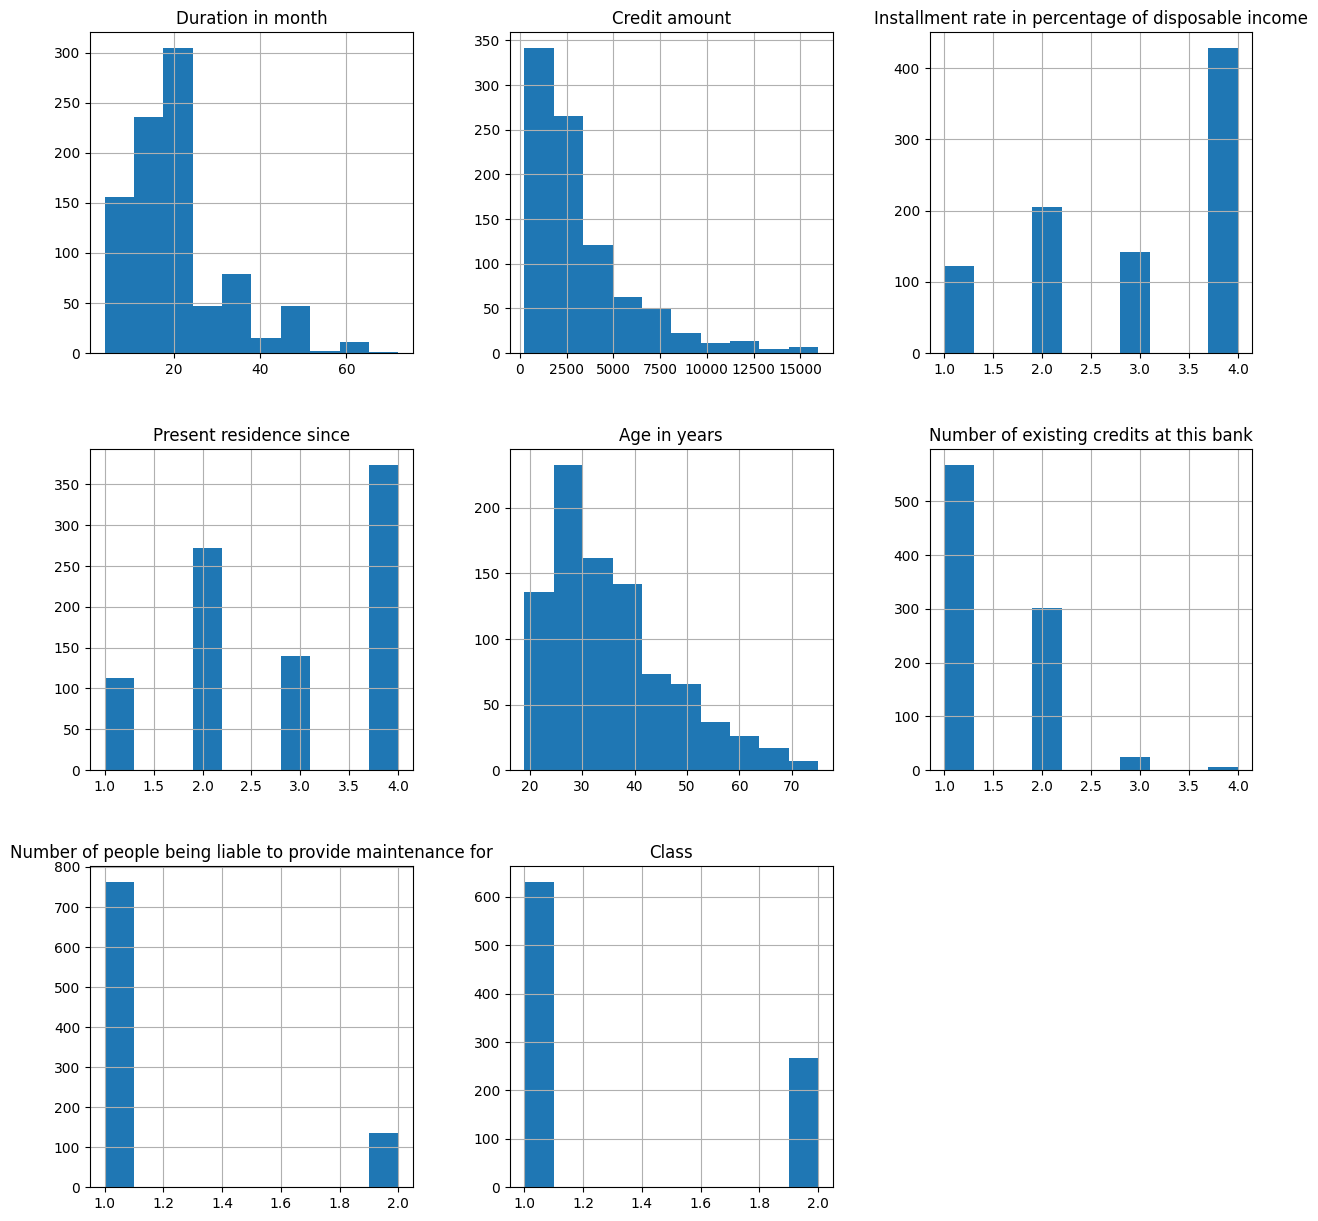

In [6]:
print(data.hist(figsize=(15,15)))

In [7]:
atributes = ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income',
             'Present residence since', 'Age in years', 'Number of existing credits at this bank', 
             'Number of people being liable to provide maintenance for']
data[atributes].corr(method='pearson').round(2)

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
Duration in month,1.00,0.63,0.07,0.03,-0.03,-0.01,-0.01
Credit amount,0.63,1.00,-0.27,0.03,0.02,0.03,0.02
Installment rate in percentage of disposable income,0.07,-0.27,1.00,0.05,0.07,0.03,-0.07
Present residence since,0.03,0.03,0.05,1.00,0.27,0.09,0.04
Age in years,-0.03,0.02,0.07,0.27,1.00,0.15,0.12
Number of existing credits at this bank,-0.01,0.03,0.03,0.09,0.15,1.00,0.10
Number of people being liable to provide maintenance for,-0.01,0.02,-0.07,0.04,0.12,0.10,1.00


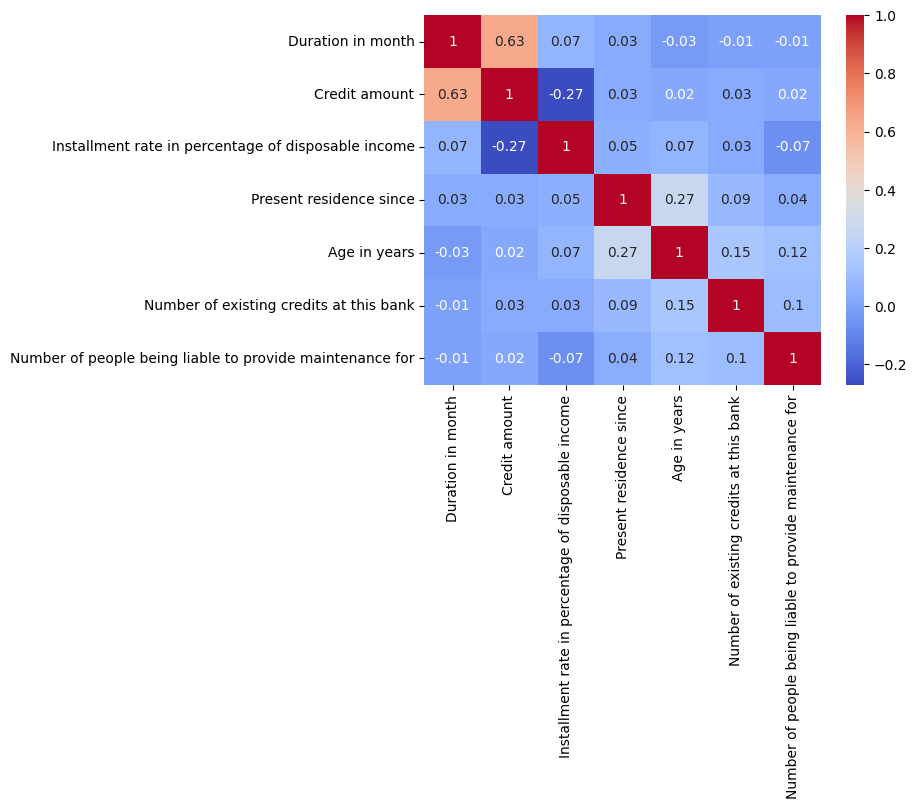

In [8]:
corrMatrix=data[atributes].corr().round(2)
sn.heatmap(  corrMatrix  , annot=True , cmap='coolwarm')
plt.show()

In [9]:
## are there null data?
any(data.isnull().any())

False

# Data transformation

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [11]:
numeric_list = ['Duration in month', 
                'Credit amount', 
                'Installment rate in percentage of disposable income', 
                'Present residence since', 'Age in years', 
                'Number of existing credits at this bank', 
                'Number of people being liable to provide maintenance for']
categorical_list = ['Status of existing checking account',
    'Credit history',
    'Purpose',
    'Savings account/bonds',
    'Present employment since',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Property',
    'Other installment plans',
    'Housing',
    'Job',
    'Telephone',
    'foreign worker']

In [12]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [13]:
transformer = ColumnTransformer([('num', numeric_transformer, numeric_list), 
                                 ('cat', categorical_transformer, categorical_list)])

In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((629, 20), (270, 20), (629,), (270,))

# Model1, DecisionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [18]:
model_decision_tree = Pipeline([
    ('transformer', transformer),
    ('decision_tree', decision_tree)
])

In [19]:
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [20]:
y_predict = model_decision_tree.predict(X_test)
y_predict

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1])

In [21]:
y_test.values

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 1])

In [22]:
model_decision_tree.score(X_test, y_test)

0.6592592592592592

In [23]:
max_depth=[2,4,6,8,10]
min_samples_leaf=[2,4,6,8,10,12,14]
params = {"decision_tree__max_depth": max_depth, "decision_tree__min_samples_leaf": min_samples_leaf}

In [24]:

grid_DT = GridSearchCV(model_decision_tree, 
                       param_grid=params,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       n_jobs=-1,
                       verbose=2
                      )

In [25]:
grid_DT.fit(X, y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=4; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=2; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=2; total time=   0.3s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=2; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=2; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=4; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=2; total time=   0.2s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=6; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=4; total time=   0.2s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=6; total time=   0.1s
[CV] END decision_tree__max_depth=2, decision_tree__min_samples_leaf=6; total time=   0.1s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Duration '
                                                                          'in '
                                                                          'month',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Installment '
                                                                          'rate '
                                                                          'in '
                                                                          'percentage '
                                                                          'of '
                                                                          'disposable '
                                                                          'income',
                                                                          'Present '
                                                                          'residence '
                                                                          'since',
                                                                          'Age '
                                                                          'in '
                                                                          'years',
                                                                          'Number '
                                                                          'of '
                                                                          'existing '
                                                                          'credits '
                                                                          'at '
                                                                          'this '
                                                                          'bank',
                                                                          'Number '
                                                                          'of '
                                                                          '...
                                                                          'and '
                                                                          'sex',
                                                                          'Other '
                                                                          'debtors '
                                                                          '/ '
                                                                          'guarantors',
                                                                          'Property',
                                                                          'Other '
                                                                          'installment '
                                                                          'plans',
                                                                          'Housing',
                                                                          'Job',
                                                                          'Telephone',
                                                                          'foreign '
                                                                          'worker'])])),
                                       ('

In [26]:
grid_DT.best_params_

{'decision_tree__max_depth': 8, 'decision_tree__min_samples_leaf': 4}

In [27]:
decision_tree_tunned = DecisionTreeClassifier(max_depth=8, min_samples_leaf=4)

In [28]:
model_decision_tree_tunned = Pipeline([('transformer', transformer),('decision_tree_tunned', decision_tree_tunned)])

In [29]:
model_decision_tree_tunned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(...ehot',
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('decision_tree_tunned',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=4))])

In [30]:
model_decision_tree_tunned.score(X_test, y_test)

0.6851851851851852

In [31]:
model_decision_tree_tunned_scores = cross_val_score(model_decision_tree_tunned, 
                                         X, 
                                         y, 
                                         scoring='neg_mean_squared_error',
                                         cv=5
                                         )

In [34]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Desviation:', scores.std())

In [33]:
model_decision_tree_tunned_scores = np.sqrt(-model_decision_tree_tunned_scores)
display_scores(model_decision_tree_tunned_scores)

Scores: [0.5725188  0.52704628 0.5527708  0.50552503 0.49579235]
Mean: 0.5307306514990374
Standard Desviation: 0.028641230174784274


## Decision Tree results
| Model   |  Mean  | SD  | Parameters  |
|---|---|---|---|
|  Decision Tree  |    0.5307    |    0.02864     |   max_depth=8, min_samples_leaf=4 

# Model2, Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

In [36]:
model_logistic_regression = Pipeline([
    ('transformer', transformer),
    ('logistic_regression', logistic_regression)
])

In [37]:
model_logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [38]:
model_logistic_regression.score(X_test, y_test)

0.7777777777777778

In [39]:
params_LR = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l2'],
    'logistic_regression__solver': ['sag']
}

In [40]:
grid_LR = GridSearchCV(model_logistic_regression, 
                       param_grid=params_LR,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       n_jobs=-1,
                       verbose=2
                      )

In [41]:
grid_LR.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END logistic_regression__C=0.001, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.001, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.001, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.001, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s

[CV] END logistic_regression__C=0.001, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s


[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=0.1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=0.1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_reg

/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag

[CV] END logistic_regression__C=1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=1, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.3s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=100

/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/escamilla/Documents/Python/BinaryClassification/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.2s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=sag; total time=   0.1s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Duration '
                                                                          'in '
                                                                          'month',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Installment '
                                                                          'rate '
                                                                          'in '
                                                                          'percentage '
                                                                          'of '
                                                                          'disposable '
                                                                          'income',
                                                                          'Present '
                                                                          'residence '
                                                                          'since',
                                                                          'Age '
                                                                          'in '
                                                                          'years',
                                                                          'Number '
                                                                          'of '
                                                                          'existing '
                                                                          'credits '
                                                                          'at '
                                                                          'this '
                                                                          'bank',
                                                                          'Number '
                                                                          'of '
                                                                          '...
                                                                          'guarantors',
                                                                          'Property',
                                                                          'Other '
                                                                          'installment '
                                                                          'plans',
                                                                          'Housing',
                                                                          'Job',
                                                                          'Telephone',
                                                                          'foreign '
                                                                          'worker'])])),
                                       ('logistic_regression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                         'logistic_regression__penalty': ['l2'],
                         'logistic_regression__solver': ['sag']},
             scor

In [42]:
grid_LR.best_params_

{'logistic_regression__C': 0.1,
 'logistic_regression__penalty': 'l2',
 'logistic_regression__solver': 'sag'}

In [43]:
logistic_regression_tunned = LogisticRegression(C=0.1, penalty='l2', solver='sag', random_state=42)

In [44]:
model_logistic_regression_tunned = Pipeline([
    ('transformer', transformer),
    ('logistic_regression_tunned', logistic_regression_tunned)
])

In [45]:
model_logistic_regression_tunned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(...
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('logistic_regression_tunned',
                 LogisticRegression(C=0.1, random_state=42, solver='sag'))])

In [46]:
model_logistic_regression_tunned.score(X_test, y_test)

0.7814814814814814

In [47]:
model_logistic_regression_tunned_scores = cross_val_score(model_logistic_regression_tunned, 
                                         X, 
                                         y, 
                                         scoring='neg_mean_squared_error',
                                         cv=5
                                         )

In [48]:
model_logistic_regression_tunned_scores = np.sqrt(-model_logistic_regression_tunned_scores)
display_scores(model_logistic_regression_tunned_scores)

Scores: [0.51099032 0.48304589 0.49441323 0.50552503 0.47271946]
Mean: 0.49333878735101144
Standard Desviation: 0.014087839227147906


## Logistic Regression results 
| Model   |  Mean  | SD  | Parameters  |
|---|---|---|---|
|  Logistic Regression  |   0.49333    |    0.01408     |   logistic_regression__C: 0.1, 'logistic_regression__penalt': 'l2'  'logistic_regression__solvr': 'sag'

## Model3, Support Vector machines

In [49]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.get_params

<bound method BaseEstimator.get_params of SVC(random_state=42)>

In [50]:
model_support_vector_machines = Pipeline([
    ('transformer', transformer),
    ('svm', svm)
])

In [51]:
model_support_vector_machines.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('svm', SVC(random_state=42))])

In [52]:
model_support_vector_machines.score(X_test, y_test)

0.7592592592592593

In [53]:
params_SVM = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.01, 0.1, 1, 'scale']
}
grid_SVM = GridSearchCV(model_support_vector_machines, 
                       param_grid=params_SVM,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       n_jobs=-1,
                       verbose=2
                      )

In [54]:
grid_SVM.fit(X, y)
grid_SVM.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   0.1s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   0.1s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   0.1s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   0.1s


[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.1s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   0.2s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.2s
[CV] END .....svm__C=0.1, svm__gamma=0.1, svm__kernel=linear; total time=   0.1s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.1s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.1s
[CV] END .....svm__C=0.1, svm__gamma=0.1, svm__kernel=linear; total time=   0.1s
[CV] END .....svm__C=0.1, svm__gamma=0.1, svm__kernel=linear; total time=   0.1s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=   0.2s
[CV] END .....svm__C=0.1, svm__gamma=0.1, svm__kernel=linear; total time=   0.1s
[CV] END .....svm__C=0.1, svm__gamma=0.1, svm__kernel=linear; total time=   0.1s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=   0.1s
[CV] END ........svm__C=0.1,

{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

In [55]:
svm_tunned = SVC(random_state=42, C=1, gamma='scale', kernel='rbf')

In [56]:
model_support_vector_machines_tunned = Pipeline([
    ('transformer', transformer),
    ('svm_tunned', svm_tunned)
])

In [57]:
model_support_vector_machines_tunned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration in month',
                                                   'Credit amount',
                                                   'Installment rate in '
                                                   'percentage of disposable '
                                                   'income',
                                                   'Present residence since',
                                                   'Age in years',
                                                   'Number of existing credits '
                                                   'at this bank',
                                                   'Number of people being '
                                                   'liable to provide '
                                                   'maintenance for']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Status of existing '
                                                   'checking account',
                                                   'Credit history', 'Purpose',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Property',
                                                   'Other installment plans',
                                                   'Housing', 'Job',
                                                   'Telephone',
                                                   'foreign worker'])])),
                ('svm_tunned', SVC(C=1, random_state=42))])

In [58]:
model_support_vector_machines_tunned.score(X_test, y_test)

0.7592592592592593

In [59]:
model_support_vector_machines_tunned_scores = cross_val_score(model_support_vector_machines_tunned, 
                                         X, 
                                         y, 
                                         scoring='neg_mean_squared_error',
                                         cv=5
                                         )

In [60]:
model_support_vector_machines_tunned_scores = np.sqrt(-model_support_vector_machines_tunned_scores)
display_scores(model_support_vector_machines_tunned_scores)

Scores: [0.48876261 0.45946829 0.47140452 0.48304589 0.46074994]
Mean: 0.47268624984558094
Standard Desviation: 0.011701319442326899


## Support Vector Machines results 
| Model   |  Mean  | SD  | Parameters  |
|---|---|---|---|
|  suppor_vector_nachines  |   0.472686    |   0.01170    |   C: 1, gamma: 'scale', kernel: 'rbf'

## Results comparison

In [62]:
list_model = ['Decision Tree', 'Logistic Regression', 'Support Vector Machines']
list_mean = [0.5307, 0.4933, 0.4726]
list_sd = [0.02864, 0.0140, 0.0117]

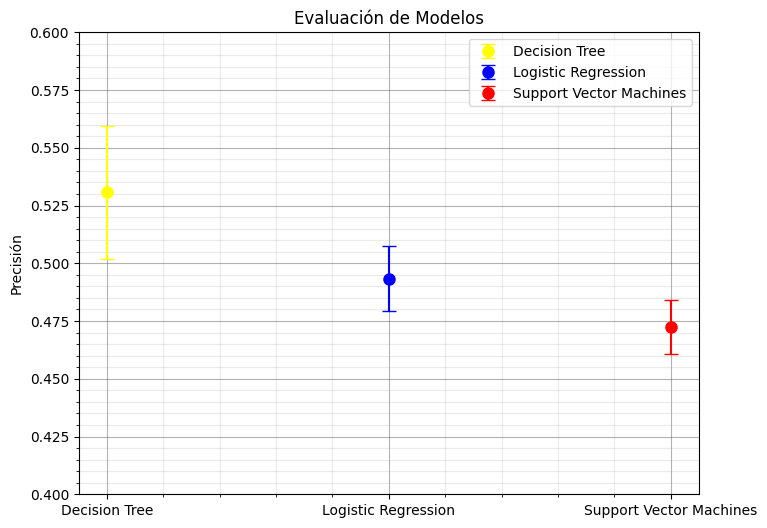

In [63]:
plt.figure(figsize=(8, 6))
color = ['blue', 'red', 'yellow']
for i in range(3):
    plt.errorbar(i, list_mean[i], yerr=list_sd[i], fmt='o', capsize=5, label=list_model[i], markersize=8, color=color[i-1])

plt.xticks(range(3), list_model)
plt.title("Evaluación de Modelos")
plt.ylabel("Precisión")
plt.ylim(0.4, 0.6)
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()
plt.show()


## Validation (Support Vector Machines)

In [64]:
data_validation = pd.read_csv('data/validation/german_validation.csv')
data_validation.columns = column_names

In [65]:
data_validation.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,A14,20,A34,A40,3485,A65,A72,2,A91,A101,...,A121,44,A143,A152,2,A173,1,A192,A201,1
1,A14,36,A34,A41,10477,A65,A75,2,A93,A101,...,A124,42,A143,A153,2,A173,1,A191,A201,1
2,A14,15,A32,A43,1386,A65,A73,4,A94,A101,...,A121,40,A143,A151,1,A173,1,A192,A201,1
3,A14,24,A32,A43,1278,A61,A75,4,A93,A101,...,A121,36,A143,A152,1,A174,1,A192,A201,1
4,A11,12,A32,A43,1107,A61,A73,2,A93,A101,...,A121,20,A143,A151,1,A174,2,A192,A201,1


In [66]:
data_validation.shape

(99, 21)

In [67]:
X_validation = data_validation.drop('Class', axis=1)
y_validation = data_validation['Class']

In [68]:
X_validation_preprocessed = model_support_vector_machines_tunned.named_steps['transformer'].transform(X_validation)

In [70]:
y_validation_predicted = model_support_vector_machines_tunned.named_steps['svm_tunned'].predict(X_validation_preprocessed)

In [71]:
y_validation_predicted

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1])

In [72]:
y_validation.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_validation, y_validation_predicted)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.69%
